In [233]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [234]:
w = pd.read_csv('https://raw.githubusercontent.com/borja876/Thinkful-DataScience-Borja/master/UNdata_Export_20170628_003608818.csv')

In [235]:
#Create DataFrame
df = pd.DataFrame(w)

In [247]:
#Cleanse Data Frame:
#Take out rows without countries
#Rename columns
#Clean columns taking out those that are not used
df1= df[:5180]
df2= df1.rename(columns={'Country or Area': 'Country', 'Quantity': 'Quantity (GWh)'})
df3 = df2.drop(["Quantity Footnotes", "Unit"], axis=1)

In [280]:
#Group by countries and calculate averages
df4 = df3.groupby(['Country'])['Quantity (GWh)'].mean()

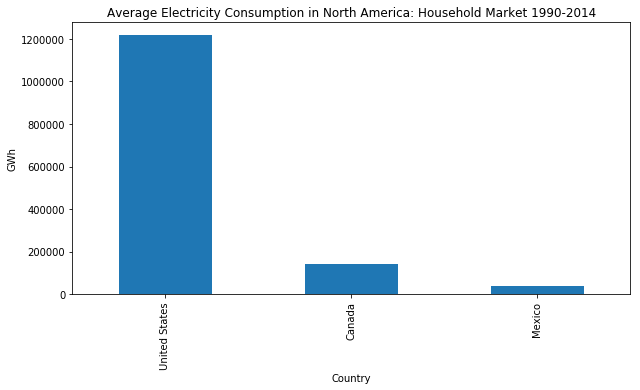

In [279]:
#North America
df9 = df4.loc[df4.index.isin(['Canada', 'Mexico', 'United States'])]
df10= df9.sort_values(ascending=[False])

plt.figure(figsize=(10, 5))
plt.ylabel('GWh')
plt.xlabel('Country')
plt.title('Average Electricity Consumption in North America: Household Market 1990-2014')
df10.plot.bar()

United States carries most of the weight of the total electricity consumption in the household market in N. America in the perdio 1990-2014. US is followed in consumption by Canada and Mexico. The average consumption in the US is about 6 times more than in Canada and about 10 times the one in Mexico.

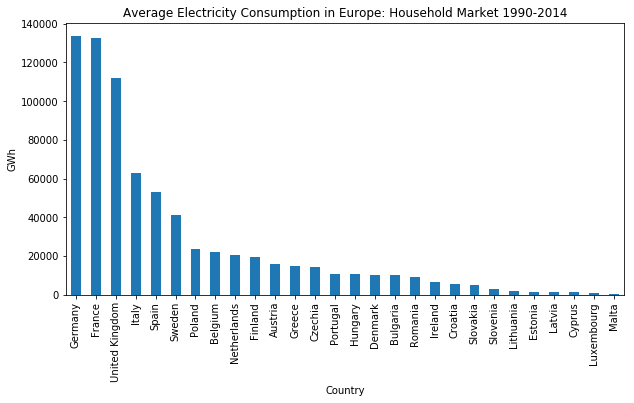

In [277]:
#Europe
df5 = df4.loc[df4.index.isin(['Austria', 'Belgium', 'Bulgaria','Croatia', 'Cyprus', 'Czechia','Denmark', 'Estonia','Finland','France','Germany','Greece','Hungary','Ireland','Italy','Latvia','Lithuania','Luxembourg','Malta','Netherlands','Poland','Portugal','Romania','Slovakia', 'Slovenia','Spain', 'Sweden', 'United Kingdom'])]
df6= df5.sort_values(ascending=[False])
plt.figure(figsize=(10, 5))
plt.ylabel('GWh')
plt.xlabel('Country')
plt.title('Average Electricity Consumption in Europe: Household Market 1990-2014')
df6.plot.bar()

Consumption in Europe is led by Germany followed by France and the United Kingdom. Spain is in the 5th place with a household consumption during the period of less than half the one of Germany. The tail of consumptionis led by Poland followed by Belgium and the Netherlands. It seems that there is a correlation between the size of the country and the electricity consumption.

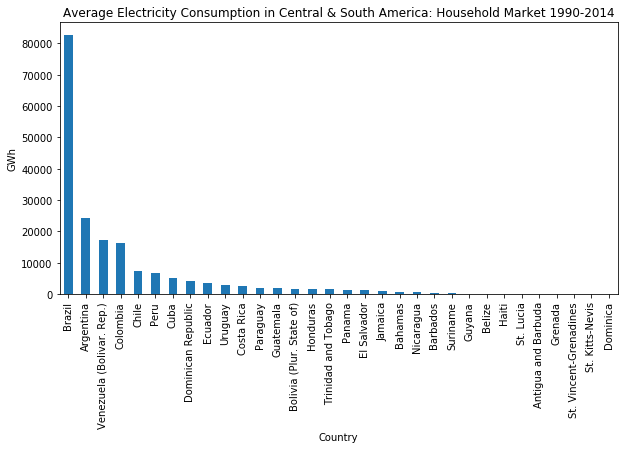

In [278]:
#Central & South America
df7 = df4.loc[df4.index.isin(['Antigua and Barbuda', 'Argentina', 'Bahamas','Barbados', 'Belize', 'Bolivia (Plur. State of)','Brazil','Chile','Colombia','Costa Rica','Cuba','Dominica','Dominican Republic','Ecuador','El Salvador','Grenada','Guatemala','Guyana','Haiti','Honduras','Jamaica','Nicaragua','Panama', 'Paraguay','Peru', 'St. Kitts-Nevis', 'St. Lucia','St. Vincent-Grenadines','Suriname','Trinidad and Tobago','Uruguay','Venezuela (Bolivar. Rep.)'])]
df8= df7.sort_values(ascending=[False])

plt.figure(figsize=(10, 5))
plt.ylabel('GWh')
plt.xlabel('Country')
plt.title('Average Electricity Consumption in Central & South America: Household Market 1990-2014')
df8.plot.bar()

Electricity consumption between 1990 and 2014 in the household market in Central & SOuth America is led by Brazil frollowed by Argentina & Venezuela. Although it was expected Chile to be between the first three due to its economic development, its in the 5 place after Colombia. Compared to Brazil (first place) households consumption in Argentina (second place) is about 4 times less.

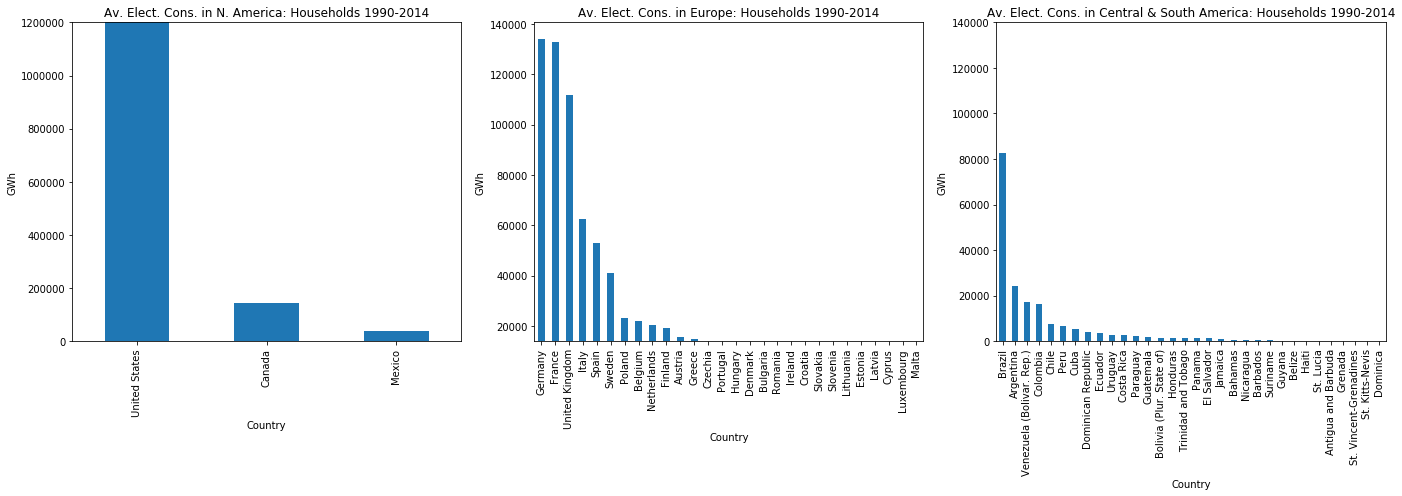

In [242]:
plt.figure(figsize=(20, 7))

plt.subplot(1, 3, 1)
df10.plot.bar()
plt.ylabel('GWh')
plt.xlabel('Country')
plt.ylim(0,1200000)
plt.title('Av. Elect. Cons. in N. America: Households 1990-2014')

plt.subplot(1, 3, 2)
df6.plot.bar()
plt.ylabel('GWh')
plt.xlabel('Country')
plt.ylim(14000)
plt.title('Av. Elect. Cons. in Europe: Households 1990-2014')

plt.subplot(1, 3, 3)
df8.plot.bar()
plt.ylabel('GWh')
plt.xlabel('Country')
plt.ylim(0,140000)
plt.title('Av. Elect. Cons. in Central & South America: Households 1990-2014')

#plt.legend(loc='lower right',prop={'size':14})
plt.tight_layout()
plt.show()

The comparison between North America, Europe and Central & South America shows that average eletricity consumption in North America is 8.5 times bigger than the one in Europe (comparing the best in breed in each case). Europe compared to Central & South America has an average consumption 1.8 bigger. Within each regions variations are high concentrating most of the region´s consumption in less than 10 contries.

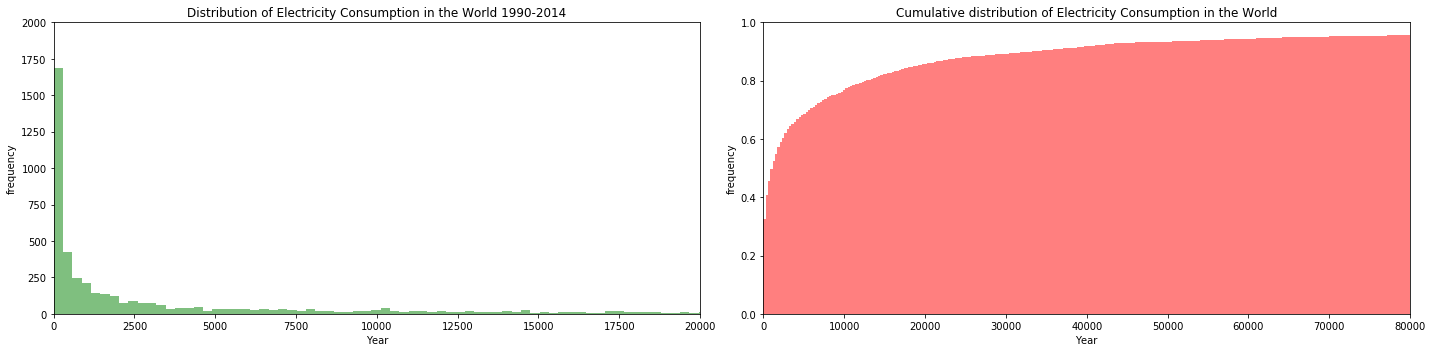

In [310]:
#Histograms showing consumption in the World 1990-2014
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.xlabel("Electricity Consumption")
plt.ylabel("Frequency")
plt.hist(df3['Quantity (GWh)'], bins=5000 ,facecolor='green', alpha=0.5)
plt.axis([0, 20000, 0, 2000])
plt.ylabel('frequency')
plt.xlabel('Year')
plt.title('Distribution of Electricity Consumption in the World 1990-2014')

plt.subplot(1, 2, 2)
plt.xlabel("Electricity Consumption")
plt.ylabel("Frequency")
plt.hist(df3['Quantity (GWh)'], bins=5000 ,facecolor='red', normed=1, cumulative=1, alpha=0.5)
plt.axis([0, 80000, 0, 1])
plt.ylabel('frequency')
plt.xlabel('Year')
plt.title('Cumulative distribution of Electricity Consumption in the World')

plt.tight_layout()
plt.show()

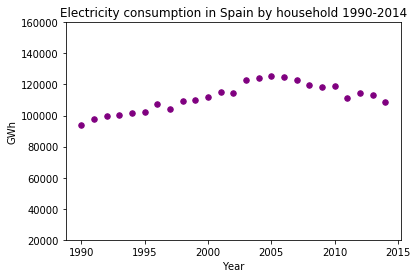

In [256]:
#Dynamic analysis of the electricity consumption in Spain (delving into the details of Europe)
df1 = df.ix[lambda df: w['Country or Area'] == "Spain", :]
plt.scatter(x = df1["Year"], y = df1['Quantity'], color = 'purple', marker = 'o', s = 30)
plt.ylabel('GWh')
plt.xlabel('Year')
plt.ylim([20000, 160000])
plt.title('Electricity consumption in Spain by household 1990-2014')
plt.show()

There is a sustained growth in the electricity consumption in Spain from 1990 to 2014. This is a good indicator of the economic growth of the country although between 2005 and 2015 there is a decrease in the interannual grouwth due to aggressive energy efficiency measures.

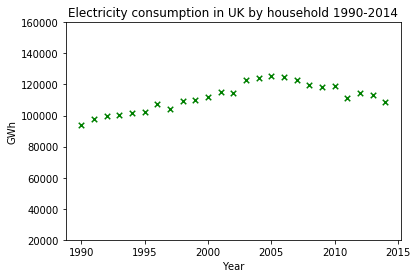

In [258]:
#Dynamic analysis of electricity consumption in The UK
df2 = df.ix[lambda df: w['Country or Area'] == "United Kingdom", :]
plt.scatter(x = df2["Year"], y = df2['Quantity'], color = 'green', marker = 'x', s = 30)
plt.ylabel('GWh')
plt.xlabel('Year')
plt.ylim([20000, 160000])
plt.title('Electricity consumption in UK by household 1990-2014')
plt.show()

The electricity consumption experiments a moderate growth from 1990 to 2015. There is a higher growth between 1990 and 2005 than from 2005 onwards. In the last 10 years of the period under analysis, the UK´s electricity consumption in the household segment has decreased. At the end of the period electricity consumption levels have fallen to those in the year 2000.

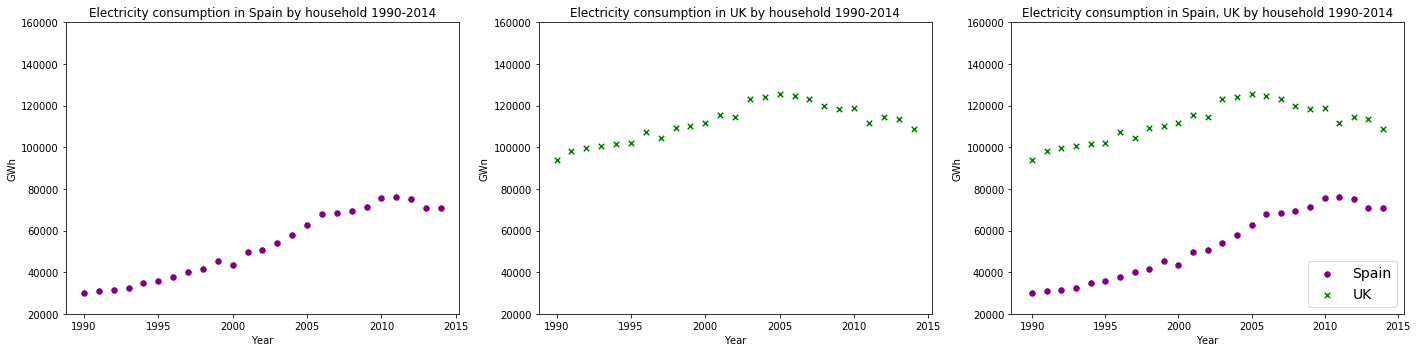

In [245]:
#Dynamic Comparison of the Electricity consumption between The UK & Spain 
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
plt.scatter(x = df1["Year"], y = df1['Quantity'], color = 'purple', marker = 'o', s = 30)
plt.ylabel('GWh')
plt.xlabel('Year')
plt.ylim([20000, 160000])
plt.title('Electricity consumption in Spain by household 1990-2014')

plt.subplot(1, 3, 2)
plt.scatter(x = df2["Year"], y = df2['Quantity'], color = 'green', marker = 'x', s = 30)
plt.ylabel('GWn')
plt.xlabel('Year')
plt.ylim([20000, 160000])
plt.title('Electricity consumption in UK by household 1990-2014')

plt.subplot(1, 3, 3)
plt.scatter(x = df1["Year"], y = df1['Quantity'], color = 'purple', marker= "o", s= 30, label="Spain")
plt.scatter(x = df2["Year"], y = df2['Quantity'], color = 'green', marker ="x", s= 30, label="UK")
plt.ylabel('GWh')
plt.xlabel('Year')
plt.ylim([20000, 160000])
plt.title('Electricity consumption in Spain, UK by household 1990-2014')

plt.legend(loc='lower right',prop={'size':14})
plt.tight_layout()
plt.show()

The electricity consumption in the UK is higher than Spain due to weather conditions. During the first 15 years (1990-2005) there has been an increase in consumption in both countries. From 2005 onwards, electricity consumption in the UK has experiences a reduction while in Spain it has continued to grow at a lower pace. This makes the gap between both values at the end of the period lower.

There is an asymetric distribution of electricity consumtpion values in the world. While most of them are in the range from 0-10000 GWh, contries like the US has a consumption of 120 times bigger. Additionally, frequency rises to 0.95 when the electricity consumption reaches 80000GWh which is similar to the consumption in Brazil. 